# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict weather the parkinglot is occupied or empty. You are provided with a dataset of parkinglot images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation)
### **Dataset Name:** ParkingLot Occupation

### **Description:**  
The dataset contains images of labeld parkinglot images for classification purposes. Each image belongs to one of the 2 classes, representing the label.

### **Labels:**
* `empty`
* `occupied`


## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation).

In [ ]:
!kaggle datasets download -d khaledzsa/parkinglot-occupation
!unzip parkinglot-occupation.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/parkinglot-occupation
License(s): unknown
  0% 0.00/5.21M [00:00<?, ?B/s]
100% 5.21M/5.21M [00:00<00:00, 71.6MB/s]
Archive:  parkinglot-occupation.zip
  inflating: ParkingLot_Occupation/test/empty/roi_004a880991fb418298519ca2616f3147_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_01a29d413e3642d39e11414dc6e95501_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_023ee6f9ea20407da126475ef5bfe567_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_03fffe90162c4e06be43e47f34d9e83a_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_04c6ff9e977d4f59bbf963bfb97f6872_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_0571fcbaa9b94ddfaf5c65edad33e59e_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_064a5abf3c7d47f9942f77da2a2af7e7_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_066690ec6e534d9fbe6be7f9acffb48d_empty.jpg  
  inflating: ParkingLot_Occupation

## Import Libraries

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import keras

## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [ ]:
# Set parameters for image processing
batch_size = 32
image_size = (64, 64)

## Data Splitting
In this section, we will split our dataset into three parts:

* `train` Folder: Training set (85%).
* `train` Folder: Validation set (15%).
* `test` Folder: Test set (100%).

In [42]:
# Loading training and validation datasets
train_ds , valid_ds = keras.utils.image_dataset_from_directory(
    directory='/content/ParkingLot_Occupation/train',
    labels='inferred',
    label_mode='binary',  # Set to binary for empty/occupied classification
    validation_split=0.15,
    subset='both',
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
)

# Loading test dataset
test_ds = keras.utils.image_dataset_from_directory(
    directory='/content/ParkingLot_Occupation/test',
    labels='inferred',
    label_mode='binary',
    image_size=image_size,
    batch_size=batch_size
)

Found 1382 files belonging to 2 classes.
Using 1175 files for training.
Using 207 files for validation.
Found 344 files belonging to 2 classes.


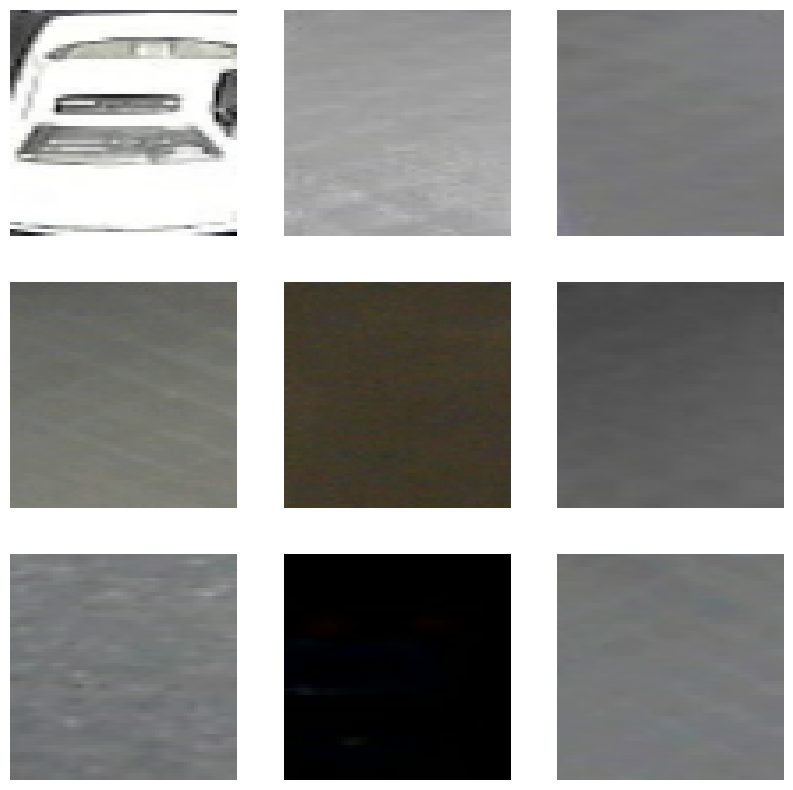

In [43]:
import numpy as np
import matplotlib.pyplot as plt


 #to show pics
plt.figure(figsize= (10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(np.array(images[i]).astype('uint8'))
    plt.axis("off")

In [44]:
data_agumentation = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomBrightness(factor=0.2)
] #defining data data agumentation

def data_agu(images): #function that it's job to take image then apply to it data agumentation
  for layer in data_agumentation:
    images=layer(images)
  return images

In [45]:
train_ds_agu = train_ds.map(lambda x,y:(data_agu(x),y)) #applying data agumentation

## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [51]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

#just importing the libraries

In [52]:
# defining model
model = models.Sequential([

    #block 1
    layers.Conv2D(32, (3,3) , padding='same' , activation='relu' , input_shape=(64,64,3)),
    layers.Rescaling(1./255), #normalizing data to have range from [0,1]
    layers.MaxPooling2D(pool_size=(2,2) , strides=2 , padding='same'),

    #block 2
    layers.Conv2D(62, (3,3) , padding='same' , activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2) , strides=2 , padding='same'),

    #block 3
    layers.Conv2D(128, (3,3) , padding='same' , activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'),

    layers.Dropout(0.25),  # Dropout to prevent overfitting sience my model is prone to overfitting

    Flatten(),

    #ANN
    Dense(128 , activation='relu'),
    Dense(64 , activation='relu'),
    Dense(32 , activation= 'relu'),

    Dense(1 , activation='sigmoid') #output layer
])

model.summary() #displying model after adding all the layers

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 32, 32, 62)          │          17,918 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 16, 16, 62)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 16, 16, 128)         │          71,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,149,439 (4.38 MB)

 Trainable params: 1,149,439 (4.38 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [53]:
# compling model
model.compile(optimizer='adam',
              loss='binary_crossentropy', #because we have (empty) or (occupied)
              metrics=['accuracy'])

In [54]:
#fitting model
history = model.fit(
    train_ds_agu,
    validation_data=valid_ds,
    epochs=10
)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 14s 301ms/step - accuracy: 0.6769 - loss: 0.4803 - val_accuracy: 0.9372 - val_loss: 0.2225
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 12s 304ms/step - accuracy: 0.9197 - loss: 0.1945 - val_accuracy: 0.9324 - val_loss: 0.1989
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 461ms/step - accuracy: 0.9244 - loss: 0.1851 - val_accuracy: 0.9469 - val_loss: 0.1309
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 356ms/step - accuracy: 0.9395 - loss: 0.1394 - val_accuracy: 0.9614 - val_loss: 0.1153
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 352ms/step - accuracy: 0.9517 - loss: 0.1299 - val_accuracy: 0.9469 - val_loss: 0.1646
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 307ms/step - accuracy: 0.9519 - loss: 0.1443 - val_accuracy: 0.9662 - val_loss: 0.0961
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 306ms/step - accuracy: 0.9550 - loss: 0.1219 - val_accuracy: 0.9517 - val_loss: 0.1034
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 333ms/step - accuracy: 0.9441 - loss: 0.1376 - val_accu

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [55]:
test_loss, test_accuracy = model.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9447 - loss: 0.1022


In [57]:
# Display test accuracy
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9593


since training accuracy is 0.9397 and testing accuracy is 0.9888 and difference is not that big but we can say the model is prone to overfitting  

## Make Predictions
Use the trained model to make predictions on new or unseen traffic sign images.

if you need new, we prepared some data for you [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

If you ran the command above, you should have a file called ParkingLot_Occupation in your current directory. which contains the testing dataset.
If you ran the command above <span style='color:red;'>DON'T RUN THIS CELL</span>

In [ ]:
!kaggle datasets download -d khaledzsa/parkinglot-occupation
!unzip parkinglot-occupation.zip

In [59]:
import tensorflow as tf

#loading the image from test file (empty class)
path_test = "/content/ParkingLot_Occupation/test/empty/roi_03fffe90162c4e06be43e47f34d9e83a_empty.jpg"
img = tf.keras.utils.load_img(path_test, target_size=(64, 64))

# Convert the image to an array
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = model.predict(img_array)

# Apply softmax to the predictions to get probability scores
score = tf.nn.softmax(predictions[0])

# Print the prediction and confidence
predicted_class = tf.argmax(score)
confidence = tf.reduce_max(score)

print(f"Predicted class: {predicted_class.numpy()}, Confidence: {confidence.numpy():.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted class: 0, Confidence: 1.00


## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

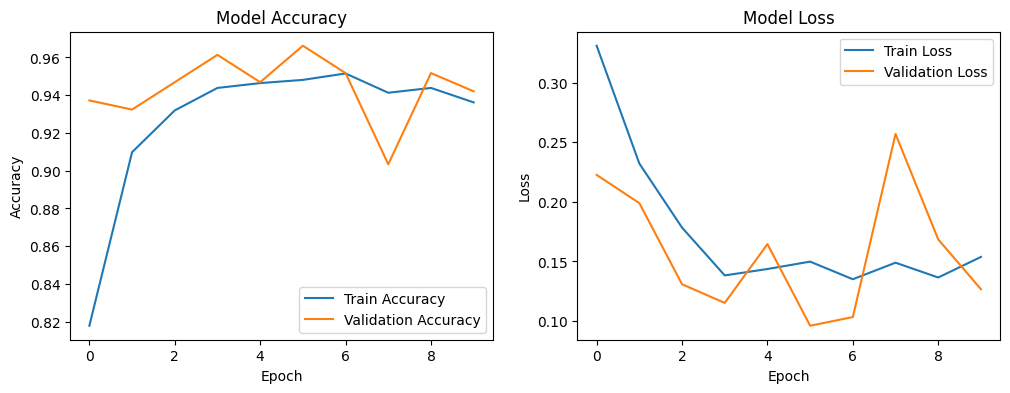

In [56]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

## Save the Model
Save the trained CNN model for submission.

In [ ]:
# Save the model
model.save('parkinglot_cnn_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying traffic signs?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

## Project Questions:

1. **Data Preprocessing**: **Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?**
first i set the parameters (batch size) , (image_size that im expecting) then i did data agumention (fliping , rotation , brightness) which create/produce/show the pictures we already have in different setting which will help in training process then i defined the model and inside it i normalized the pictures which set the values between 0,1


2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?

a-i have 3 Conv2D layers, each one is followed by Max pooling layers, and then fully connected layers at the end.The conc2d help the model learn important features like edges. And Max pooling layers reduce the size of the data. The fully connected layers then help classify the images as either occupied or empty.

b- it fist i kept trying many settings and removing and adding layers then i choosed this structure because simply its the best one of the ones i was trying


3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?

a- relu (in input and hidden layers) --> it will interduce non linearity to the model

b- sigmoid(output) --> which will produce a value between 0,1 which will tell me if the parking is epmty or occupied

4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?

to be a data scientists is to try many model/settings then choose what is best so that is what i did and i choosed what i think is best

5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying traffic signs?

a- binary cross-entropy --> loss function because we have two classes (occupied and empty).

b- accuracy --> because it's important to know how often the model is right.

6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.

I added Dropout layer to prevent overfitting. Dropout randomly turns off some neurons during training, which helps the model not depened too much on any one feature.


7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?

I evaluated the model using accuracy on the test set to see how well it performs on unseen/new data. This gives a good insights of the model's ability to generalize beyond the training data.

8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?

I plotted accuracy and loss over the epochs to see how the model is learning. i think that the model is learning well but its prone to overfitting

9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

The model showed a small gap between training and test accuracy, which suggests slight overfitting.